# IMPORTING ALL LIBRARIES 

In [189]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import LabelEncoder

In [190]:
# for data processing and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# for data resampling to remove imbalance
from imblearn.over_sampling import ADASYN, SMOTE
from imblearn.combine import SMOTEENN

# for feature selection
from sklearn.feature_selection import RFE

# for model training and visualization
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, AdaBoostClassifier

# for module performance evaluation
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, accuracy_score, confusion_matrix

# for filtering out warnings
import warnings
warnings.filterwarnings('ignore')

In [191]:
#converts any data type into a Pandas DataFrame and returns it. This is useful for ensuring data is in a readable and consistent format for further analysis.
#parameters: Data any
#Returns:  A Pandas DataFrame containing the input data.
def printdf(data: any) -> pd.DataFrame:
    return pd.DataFrame(data)

#This function creates a heatmap to visualize missing values in the DataFrame.
#Functionality: It plots a heatmap where the presence of missing values is visualized, making it easier to identify columns with missing data.
def plot_missing_vals(data: pd.DataFrame) -> None:
    '''for plotting missing values'''
    plt.figure(figsize = (16,7))
    plt.subplot(1,2,1)
    sns.heatmap(data.isnull(), cbar = True, vmin=0, vmax=1)
    plt.title("Missing Values Plot")
    plt.show()

#This function creates a heatmap to visualize the correlation matrix of the DataFrame. It plots a heatmap of the correlation matrix to 
# visualize the correlations between different features.
def plot_heatmap(corr_matrix) -> None:
    '''for plotting heatmaps'''
    plt.subplot(figsize=(20,20))
    sns.heatmap(corr_matrix, square=True)

#This function creates count plots for each feature in the list of features, with hue based on the target variable.
def create_countplots(df, features, target) -> None:
    for feature in features:
        plt.figure(figsize=(5,5))
        sns.countplot(data=df, x=feature,hue=target)
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.legend()
        plt.title(f"Countplot for {feature}")
        plt.show()

#This function removes outliers from a specified feature in the DataFrame based on the Interquartile Range (IQR) method.
# It then removes data points that fall outside these bounds.
def remove_outliers(data,feature):
        Q1 = np.percentile(data[feature],25,interpolation="midpoint")
        Q3 = np.percentile(data[feature],75,interpolation="midpoint")
        IQR = Q3-Q1
        upper = data[feature] >= (Q3+1.5*IQR)
        lower = data[feature] <= (Q1-1.5*IQR)

        return data[~(upper | lower)]

# LOADING DATA

In [192]:
data = pd.read_csv('PCOS_data_without_infertility.csv')

data.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),...,hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm)
0,0,36,32.0,154.0,13.49,15,2,6,15.0,0,...,0,0,1,1,0.0,0,5,7,16.0,17.0
1,0,40,32.0,152.0,13.85,15,2,3,2.0,0,...,0,0,0,0,1.0,1,6,5,18.0,17.0
2,0,43,33.0,152.0,14.28,15,2,6,6.0,0,...,0,0,1,1,1.0,1,9,8,18.0,19.0
3,0,38,34.0,153.0,14.52,13,2,5,8.0,0,...,0,0,1,0,1.0,0,1,3,15.0,17.0
4,0,34,35.0,155.0,14.57,13,2,4,8.0,0,...,0,0,1,1,0.0,0,10,7,18.0,18.0


# DATA PREPROCESSING

In [193]:
data.columns

Index(['PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI',
       'Blood Group', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'Hip(inch)', 'Waist(inch)',
       'Vit D3 (ng/mL)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)'],
      dtype='object')

In [194]:
# Changing the title of the feature.

data = data.rename(columns = {"PCOS (Y/N)":"Target"})

In [195]:
data.head()

,Target,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),...,hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm)
0,0,36,32.0,154.0,13.49,15,2,6,15.0,0,...,0,0,1,1,0.0,0,5,7,16.0,17.0
1,0,40,32.0,152.0,13.85,15,2,3,2.0,0,...,0,0,0,0,1.0,1,6,5,18.0,17.0
2,0,43,33.0,152.0,14.28,15,2,6,6.0,0,...,0,0,1,1,1.0,1,9,8,18.0,19.0
3,0,38,34.0,153.0,14.52,13,2,5,8.0,0,...,0,0,1,0,1.0,0,1,3,15.0,17.0
4,0,34,35.0,155.0,14.57,13,2,4,8.0,0,...,0,0,1,1,0.0,0,10,7,18.0,18.0


In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Target                 541 non-null    int64  
 1    Age (yrs)             541 non-null    object 
 2   Weight (Kg)            541 non-null    float64
 3   Height(Cm)             541 non-null    float64
 4   BMI                    541 non-null    float64
 5   Blood Group            541 non-null    int64  
 6   Cycle(R/I)             541 non-null    int64  
 7   Cycle length(days)     541 non-null    int64  
 8   Marraige Status (Yrs)  540 non-null    float64
 9   Pregnant(Y/N)          541 non-null    int64  
 10  No. of aborptions      541 non-null    int64  
 11  FSH(mIU/mL)            541 non-null    float64
 12  LH(mIU/mL)             541 non-null    float64
 13  Hip(inch)              541 non-null    int64  
 14  Waist(inch)            541 non-null    int64  
 15  Vit D3

In [197]:
#coverting object data type to numerical data and stripping whitespace from column names.
for feature in data[data.select_dtypes(include='object').columns]: #Selects columns that have an object data type.
  data[feature] = pd.to_numeric(data[feature], errors='coerce') #Converts values in each object column to numeric.

data = data.rename(columns=lambda x: x.strip()) #This function removes any whitespace from the beginning and end of the string.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Target                 541 non-null    int64  
 1   Age (yrs)              540 non-null    float64
 2   Weight (Kg)            541 non-null    float64
 3   Height(Cm)             541 non-null    float64
 4   BMI                    541 non-null    float64
 5   Blood Group            541 non-null    int64  
 6   Cycle(R/I)             541 non-null    int64  
 7   Cycle length(days)     541 non-null    int64  
 8   Marraige Status (Yrs)  540 non-null    float64
 9   Pregnant(Y/N)          541 non-null    int64  
 10  No. of aborptions      541 non-null    int64  
 11  FSH(mIU/mL)            541 non-null    float64
 12  LH(mIU/mL)             541 non-null    float64
 13  Hip(inch)              541 non-null    int64  
 14  Waist(inch)            541 non-null    int64  
 15  Vit D3

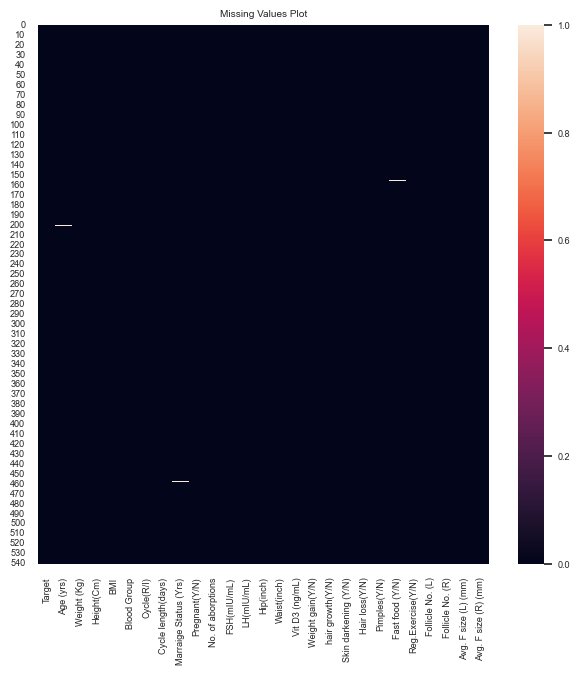

In [198]:
plot_missing_vals(data) # plotting a heatmap to visualize missing vals

We can see that Marraige Status (Yrs), Fast food (Y/N), Age (yrs) have missing values. 
  #Replaces all NaN values in the column with the calculated mean and mode value, and inplace=True modifies the DataFrame in place without needing to reassign it.


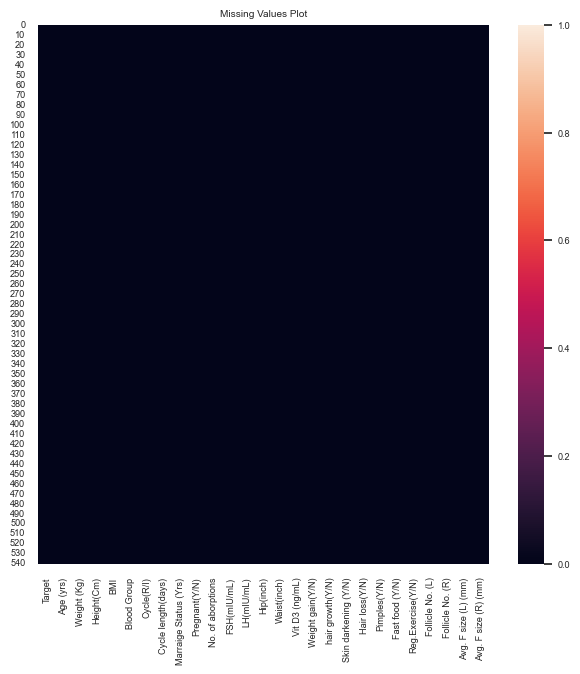

In [199]:
data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].mean(), inplace=True) 
data['Fast food (Y/N)'].fillna(data['Fast food (Y/N)'].mode()[0], inplace=True)
data['Age (yrs)'].fillna(data['Age (yrs)'].mode()[0], inplace=True)
plot_missing_vals(data) # plotting a heatmap to visualize missing vals

In [200]:
data.describe()

,Target,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),...,hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.00000,541.000000,541.000000,...,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,0.327172,31.408503,59.637153,156.484835,24.319508,13.802218,2.560074,4.94085,7.680926,0.380776,...,0.273567,0.306839,0.452865,0.489834,0.515712,0.247689,6.129390,6.641405,15.018115,15.451701
std,0.469615,5.400398,11.028287,6.033545,4.050870,1.840812,0.901950,1.49202,4.799385,0.486027,...,0.446202,0.461609,0.498234,0.500359,0.500216,0.432070,4.229294,4.436889,3.566839,3.318848
min,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,2.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,52.000000,152.000000,21.710000,13.000000,2.000000,4.00000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,13.000000,13.000000
50%,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,2.000000,5.00000,7.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,5.000000,6.000000,15.000000,16.000000
75%,1.000000,35.000000,65.000000,160.000000,26.638918,15.000000,4.000000,5.00000,10.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,9.000000,10.000000,18.000000,18.000000
max,1.000000,48.000000,108.000000,180.000000,38.900714,18.000000,5.000000,12.00000,30.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,22.000000,20.000000,24.000000,24.000000


In [201]:
# specifying target and features
target = 'PCOS (Y/N)'
all_features = list(data.columns[1:])
print('Target: ', target)
print('Features:', all_features)

Target:  PCOS (Y/N)
Features: ['Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI', 'Blood Group', 'Cycle(R/I)', 'Cycle length(days)', 'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'Hip(inch)', 'Waist(inch)', 'Vit D3 (ng/mL)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)']


In [202]:
# creating referrences for features data, binary and non-binary features data
all_features = list(data.columns[1:])
features_df = data[all_features]
binary_features = features_df.columns[(features_df.max() == 1) & (features_df.min() == 0)]
print('binary features : ', binary_features)
binary_data = features_df[binary_features]

data.info()

binary features :  Index(['Pregnant(Y/N)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Target                 541 non-null    int64  
 1   Age (yrs)              541 non-null    float64
 2   Weight (Kg)            541 non-null    float64
 3   Height(Cm)             541 non-null    float64
 4   BMI                    541 non-null    float64
 5   Blood Group            541 non-null    int64  
 6   Cycle(R/I)             541 non-null    int64  
 7   Cycle length(days)     541 non-null    int64  
 8   Marraige Status (Yrs)  541 non-null    float64
 9   Pregnant(Y/N)          541 non-null    int64  
 10  No. of aborptions      541 non-null    int64  
 

## Preprocessing Data

In [203]:
data.columns

Index(['Target', 'Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI',
       'Blood Group', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'Hip(inch)', 'Waist(inch)',
       'Vit D3 (ng/mL)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)'],
      dtype='object')

## HEAT MAP

In [204]:
#data.corr(): Calculates the Pearson correlation coefficients between all pairs of columns 
corr_matrix = data.corr().abs()  #takes the absolute value of the correlation coefficients.
corr_matrix['Target'].sort_values() #Extracts the correlation values of all features with the target variable Target and sorts them in ascending order.

Pregnant(Y/N)            0.027565
FSH(mIU/mL)              0.030319
Blood Group              0.036433
No. of aborptions        0.057158
LH(mIU/mL)               0.063879
Reg.Exercise(Y/N)        0.065337
Height(Cm)               0.068254
Vit D3 (ng/mL)           0.085494
Avg. F size (R) (mm)     0.097690
Marraige Status (Yrs)    0.112681
Avg. F size (L) (mm)     0.132992
Hip(inch)                0.162297
Waist(inch)              0.164598
Age (yrs)                0.165977
Hair loss(Y/N)           0.172879
Cycle length(days)       0.178480
BMI                      0.200155
Weight (Kg)              0.211938
Pimples(Y/N)             0.286077
Fast food (Y/N)          0.376183
Cycle(R/I)               0.401644
Weight gain(Y/N)         0.441047
hair growth(Y/N)         0.464667
Skin darkening (Y/N)     0.475733
Follicle No. (L)         0.603346
Follicle No. (R)         0.648327
Target                   1.000000
Name: Target, dtype: float64

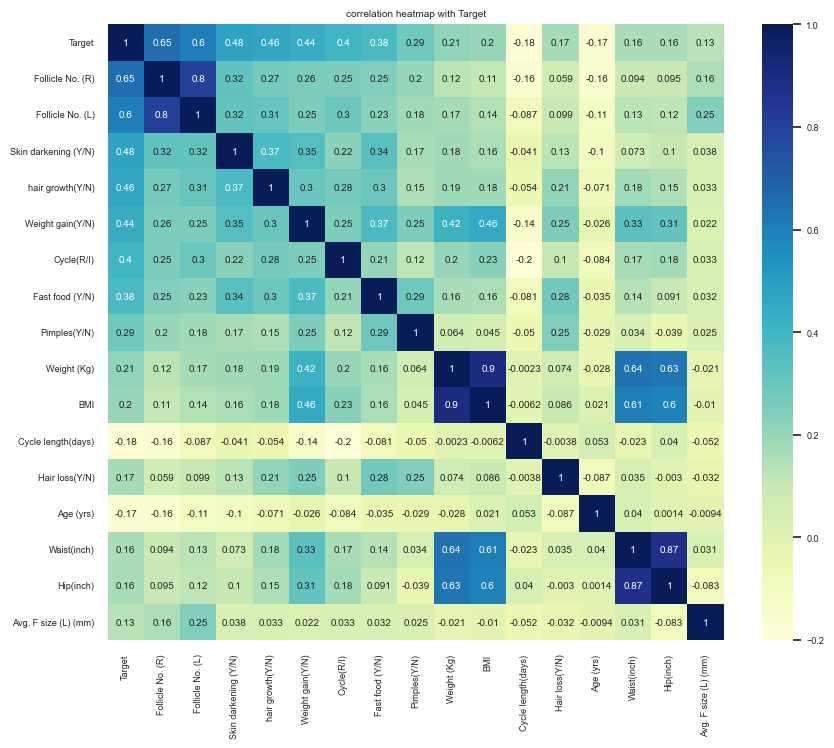

In [205]:
plt.figure(figsize=(10,8)) #specifies the width and height of the figure in inches
sns.set(font_scale=0.6) #Adjusts the scale of the fonts used in the Seaborn plots.
indexes = corr_matrix.nlargest(17, 'Target')['Target'].index #Selects the top 17 features that have the highest absolute correlation with the 'Target' variable.
cm = pd.DataFrame(np.corrcoef(data[indexes].values.T)) #Computes the correlation matrix for the selected top 17 features.
sns.heatmap(data = cm, annot = True, yticklabels = indexes.values,
            xticklabels = indexes.values, cbar =True, cmap = 'YlGnBu',
            square = True)  #Creates and displays a heatmap of the correlation matrix.
plt.title(f"correlation heatmap with {'Target'}")
plt.show()

#Filtering out features with over 65% mutual correlation factor for identification.

In [206]:
# Compute the correlation matrix
corr_matrix = data.corr().abs()

# Define the correlation threshold
correlation_threshold = 0.65  # threshold = 65%

# Create an upper triangle matrix of the correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Initialize a list to hold highly correlated feature pairs
highly_correlated_pairs = []

# Iterate through the DataFrame and find highly correlated feature pairs
for column in upper_triangle.columns:
    correlated_columns = upper_triangle.index[upper_triangle[column] >= correlation_threshold].tolist()
    for correlated_column in correlated_columns:
        pair = (column, correlated_column)
        highly_correlated_pairs.append(pair)

# Print the highly correlated pairs
highly_correlated_pairs


[('BMI', 'Weight (Kg)'),
 ('Marraige Status (Yrs)', 'Age (yrs)'),
 ('Waist(inch)', 'Hip(inch)'),
 ('Follicle No. (R)', 'Follicle No. (L)')]

## BOXPLOTS

For Non binary features.

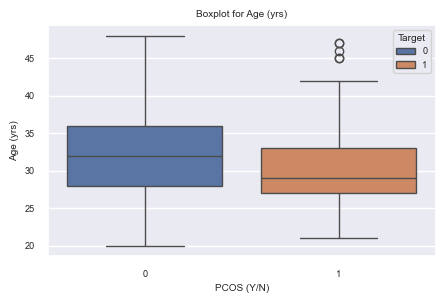

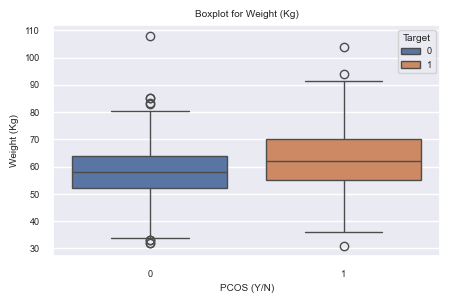

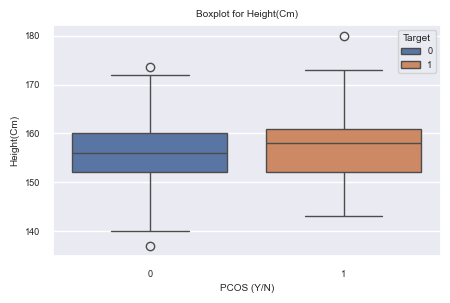

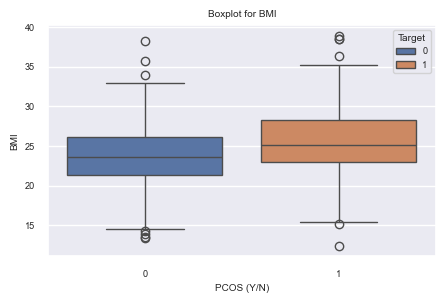

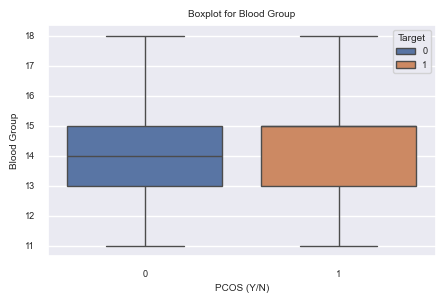

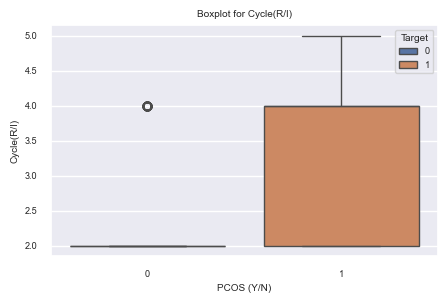

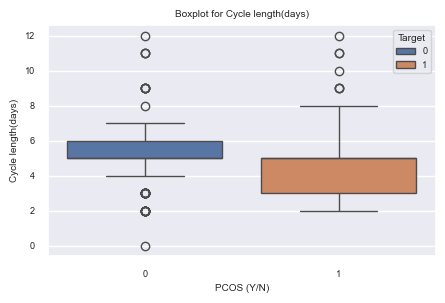

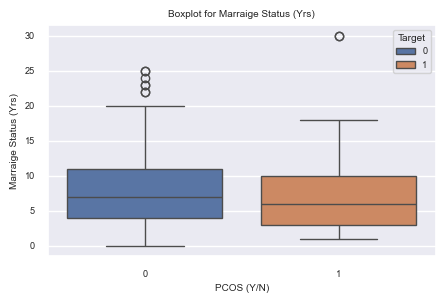

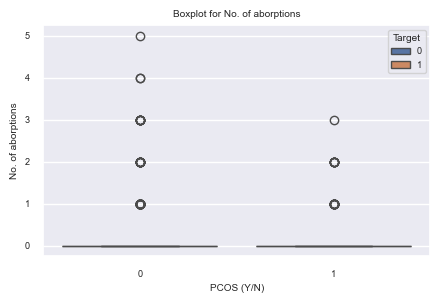

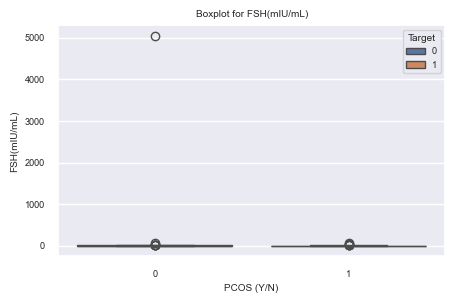

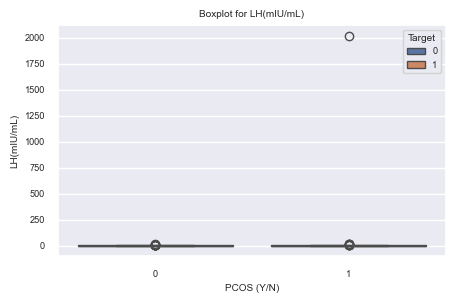

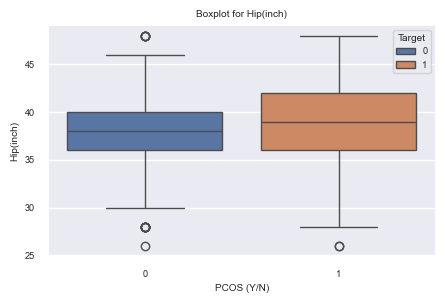

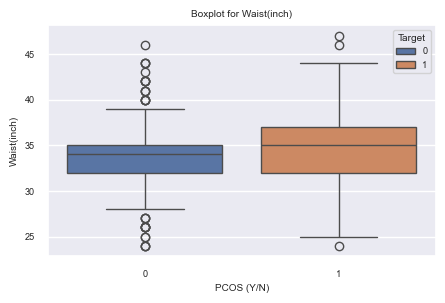

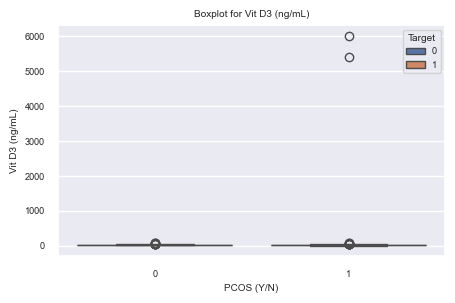

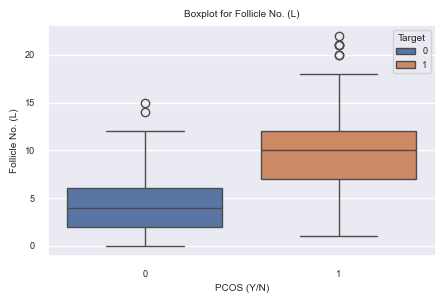

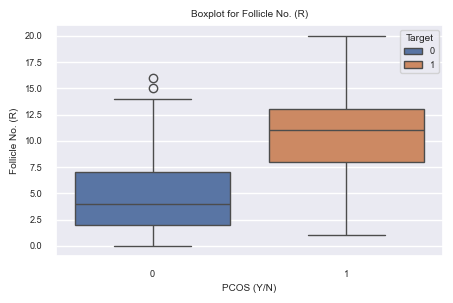

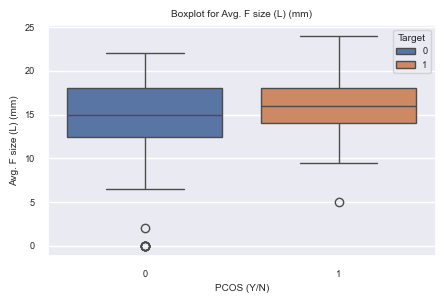

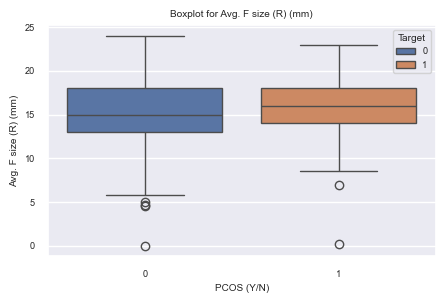

In [207]:
all_features = list(data.columns[1:]) #Creates a list of all feature column names, excluding the first column
features_df = data[all_features] #Selects all features from the dataframe.
binary_features = features_df.columns[(features_df.max() == 1) & (features_df.min() == 0)] #Identifies columns in features_df that are binary (i.e., their maximum value is 1 and minimum value is 0).
nonbinary_data = features_df.drop(binary_features, axis=1) #drops the columns specified in binary_features from features_df.
for feature in nonbinary_data.columns.to_list(): #Plots a boxplot for each non-binary feature, grouped by the Target variable.
  plt.figure(figsize=(5,3))
  sns.boxplot(data=data, x='Target', y=feature, hue = 'Target')
  plt.xlabel(target)
  plt.ylabel(feature)
  plt.title(f"Boxplot for {feature}")
  plt.show()

For Binary features

In [208]:
colors = ['#8c564b','#7f7f7f']

In [209]:
def bar_plot(variable):

    # Get feature
    var = data[variable]
    # Count number of categorical variable(value/sample)
    varValue = var.value_counts()
    # Visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index,varValue,color=colors)
    plt.xticks(varValue.index,varValue.index.values)
    plt.ylabel("Count")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

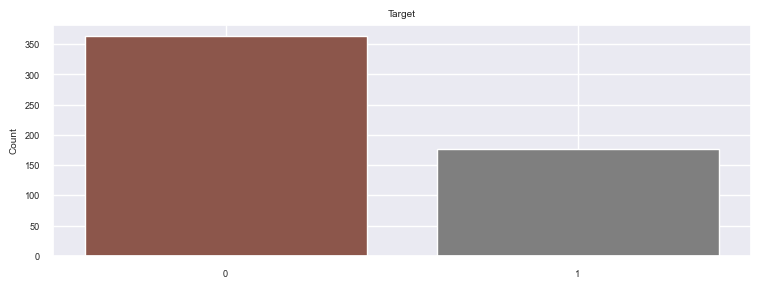

Target: 
 Target
0    364
1    177
Name: count, dtype: int64


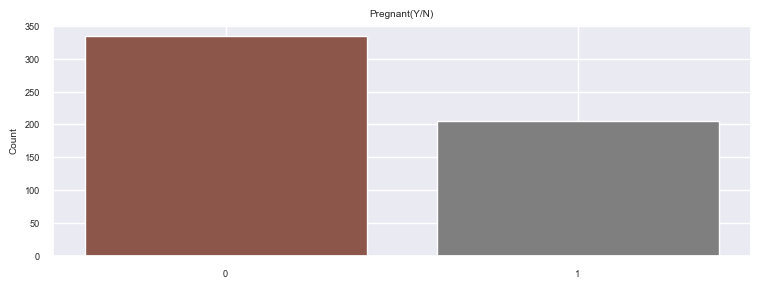

Pregnant(Y/N): 
 Pregnant(Y/N)
0    335
1    206
Name: count, dtype: int64


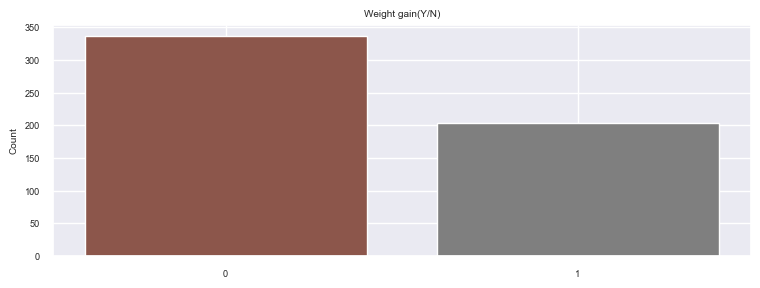

Weight gain(Y/N): 
 Weight gain(Y/N)
0    337
1    204
Name: count, dtype: int64


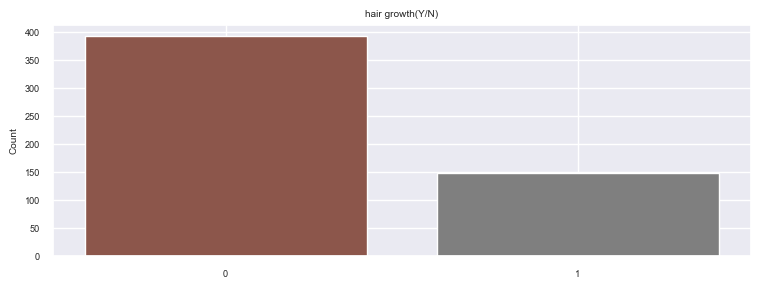

hair growth(Y/N): 
 hair growth(Y/N)
0    393
1    148
Name: count, dtype: int64


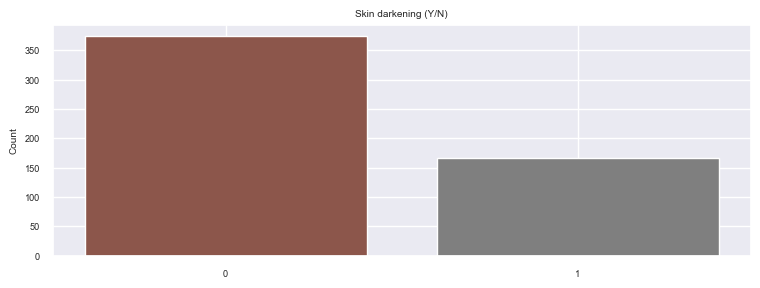

Skin darkening (Y/N): 
 Skin darkening (Y/N)
0    375
1    166
Name: count, dtype: int64


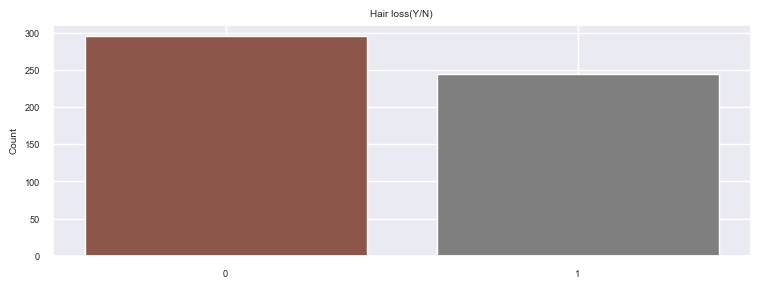

Hair loss(Y/N): 
 Hair loss(Y/N)
0    296
1    245
Name: count, dtype: int64


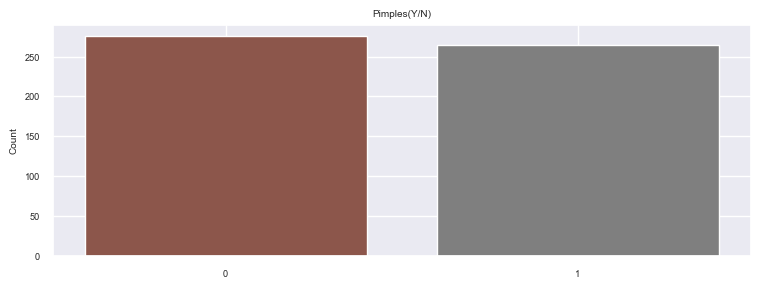

Pimples(Y/N): 
 Pimples(Y/N)
0    276
1    265
Name: count, dtype: int64


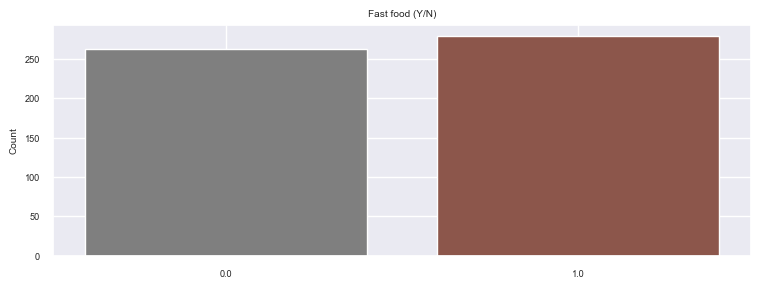

Fast food (Y/N): 
 Fast food (Y/N)
1.0    279
0.0    262
Name: count, dtype: int64


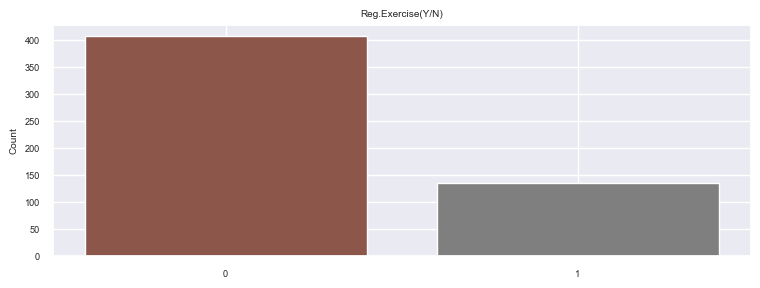

Reg.Exercise(Y/N): 
 Reg.Exercise(Y/N)
0    407
1    134
Name: count, dtype: int64


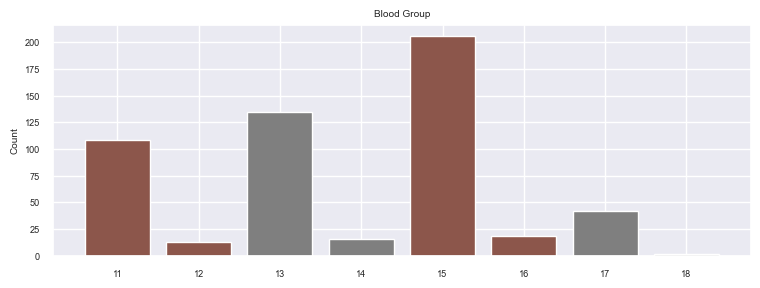

Blood Group: 
 Blood Group
15    206
13    135
11    108
17     42
16     19
14     16
12     13
18      2
Name: count, dtype: int64


In [210]:
category = ["Target", "Pregnant(Y/N)", "Weight gain(Y/N)", "hair growth(Y/N)", "Skin darkening (Y/N)", "Hair loss(Y/N)", "Pimples(Y/N)", "Fast food (Y/N)", "Reg.Exercise(Y/N)", "Blood Group"]
for c in category:
    bar_plot(c)

#numerical variable

In [211]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(data[variable], bins = 50,color=colors[1])
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

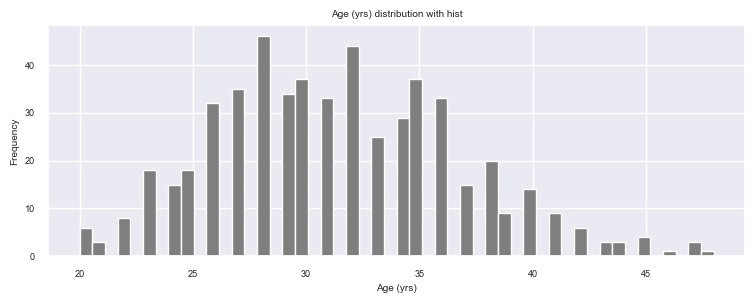

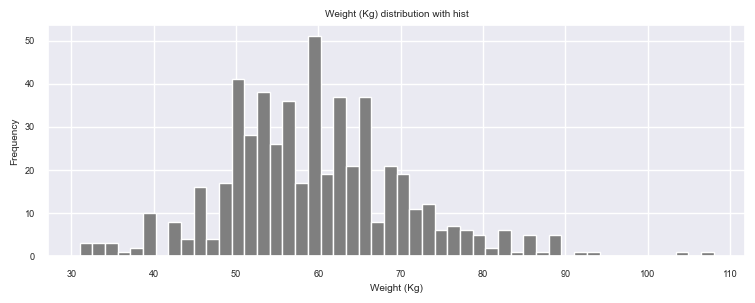

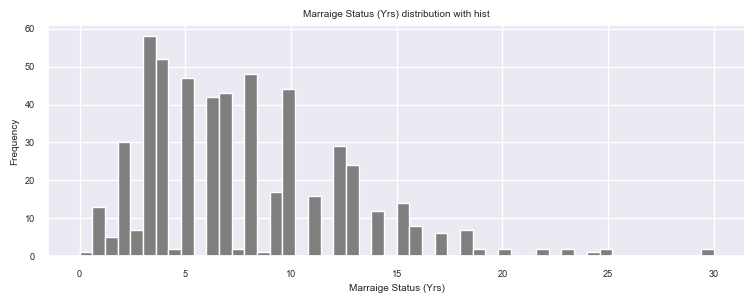

In [212]:
numericVar = ["Age (yrs)", "Weight (Kg)","Marraige Status (Yrs)"]
for n in numericVar:
    plot_hist(n)

In [213]:
data.columns

Index(['Target', 'Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI',
       'Blood Group', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'Hip(inch)', 'Waist(inch)',
       'Vit D3 (ng/mL)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)'],
      dtype='object')

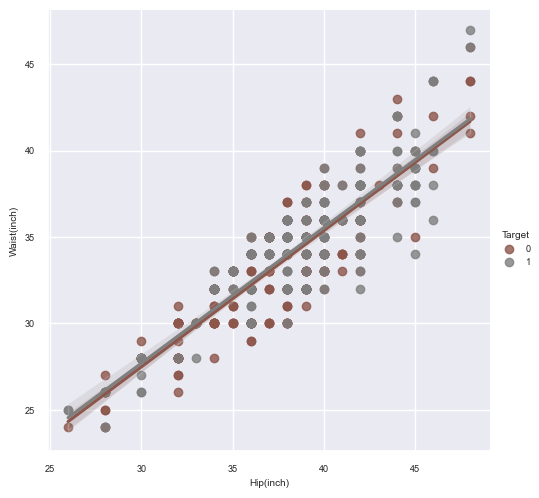

In [214]:

fig= sns.lmplot(data =data,x="Hip(inch)",y="Waist(inch)", hue="Target", palette= colors )
plt.show(fig)

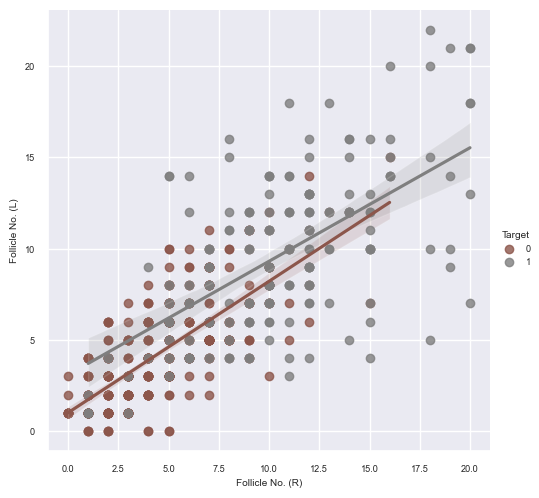

In [215]:
sns.lmplot(data =data,x='Follicle No. (R)',y='Follicle No. (L)', hue="Target",palette=colors)
plt.show()

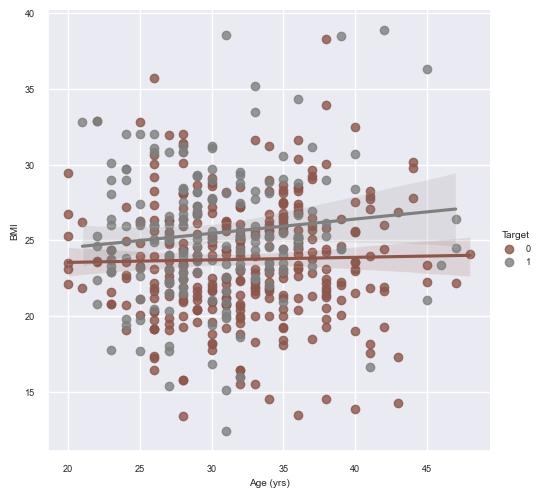

In [216]:
sns.lmplot(data =data,x='Age (yrs)',y='BMI', hue="Target",palette=colors)
plt.show()

# data modelling

In [217]:
data['Target'].value_counts()

Target
0    364
1    177
Name: count, dtype: int64

In [218]:
X= data.drop(labels = ["Target"],axis = 1)
y=data.Target

In [219]:
#Splitting the data into test and training sets.

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [220]:
print("X_train",len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 378
X_test 163
y_train 378
y_test 163


# LOGISTIC REGRESSION

In [221]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log_train = round(logreg.score(X_train, y_train)*100,2) 
acc_log_test = round(logreg.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Testing Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 91.27
Testing Accuracy: % 87.12


features selected by lr:  Index(['Height(Cm)', 'BMI', 'Cycle(R/I)', 'Marraige Status (Yrs)',
       'Pregnant(Y/N)', 'No. of aborptions', 'Hip(inch)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Pimples(Y/N)', 'Reg.Exercise(Y/N)', 'Follicle No. (L)',
       'Follicle No. (R)'],
      dtype='object')


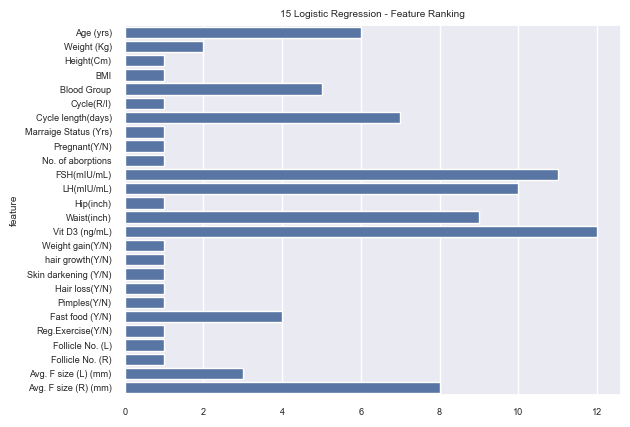

In [222]:
# Feature selection using RFE
model_lr = LogisticRegression(solver='liblinear', random_state=0)
rfe_lr = RFE(model_lr, n_features_to_select=15)

# Logistic regression
x_train_lr = rfe_lr.fit_transform(X_train, y_train)
features_lr_indices = [i for i, value in enumerate(rfe_lr.support_) if value]
features_lr = features_df.columns[features_lr_indices]
print("features selected by lr: ", features_lr)
x_train_rfe_lr = printdf(x_train_lr)
x_train_rfe_lr.columns = features_lr
# visualising ranking of features
sns.barplot(x=rfe_lr.ranking_, y=features_df.columns)
plt.title('15 Logistic Regression - Feature Ranking')
plt.ylabel("feature")
plt.show()


In [223]:
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score of the Logistic Regression model: ", f1)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the Logistic Regression model: ", accuracy)

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

F1 Score of the Logistic Regression model:  0.8108108108108109
Accuracy of the Logistic Regression model:  0.8711656441717791
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.90       108
           1       0.80      0.82      0.81        55

    accuracy                           0.87       163
   macro avg       0.86      0.86      0.86       163
weighted avg       0.87      0.87      0.87       163



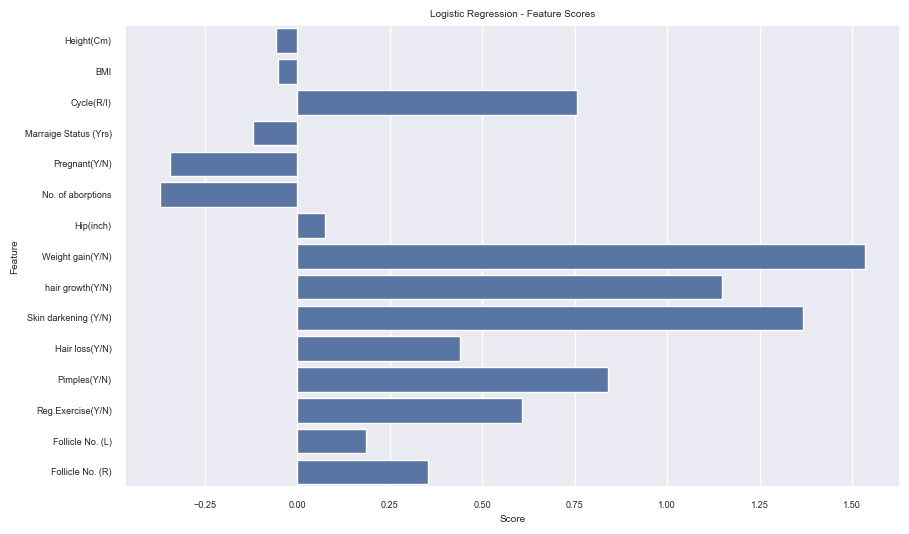

In [224]:
# Get scores for Logistic Regression
lr_model = rfe_lr.estimator_
lr_model.fit(x_train_rfe_lr, y_train)
lr_scores = lr_model.coef_[0]

# Visualizing scores for Logistic Regression
plt.figure(figsize=(10, 6))
sns.barplot(x=lr_scores, y=features_lr)
plt.title('Logistic Regression - Feature Scores')
plt.xlabel("Score")
plt.ylabel("Feature")
plt.show()

# RANDOM FOREST CLASSIFIER

In [225]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

Fitting 5 folds for each of 72 candidates, totalling 360 fits
15 features selected by rfc:  Index(['Age (yrs)', 'Weight (Kg)', 'BMI', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'Vit D3 (ng/mL)',
       'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)',
       'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (R) (mm)'],
      dtype='object')


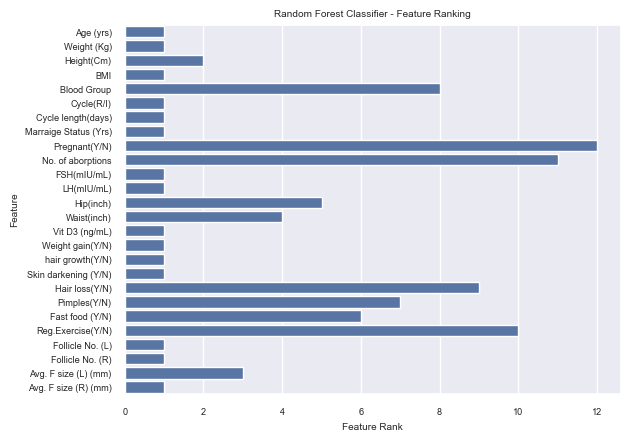

In [226]:
# Feature selection using RFE
model_rfc = RandomForestClassifier(random_state=42)
rfe_rfc = RFE(model_rfc, n_features_to_select=15)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=model_rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
best_rfc = grid_search.best_estimator_


# random forest classifier
rfe_rfc = RFE(best_rfc, n_features_to_select=15)
x_train_rfe_rfc = rfe_rfc.fit_transform(X_train, y_train)
features_rfc_indices = [i for i, value in enumerate(rfe_rfc.support_) if value]
features_rfc = features_df.columns[features_rfc_indices]
print("15 features selected by rfc: ", features_rfc)

x_train_rfe_rfc_df = pd.DataFrame(x_train_rfe_rfc, columns=features_rfc)

# Step 9: Visualize the feature rankings
sns.barplot(x=rfe_rfc.ranking_, y=features_df.columns)
plt.title('Random Forest Classifier - Feature Ranking')
plt.xlabel("Feature Rank")
plt.ylabel("Feature")
plt.show()




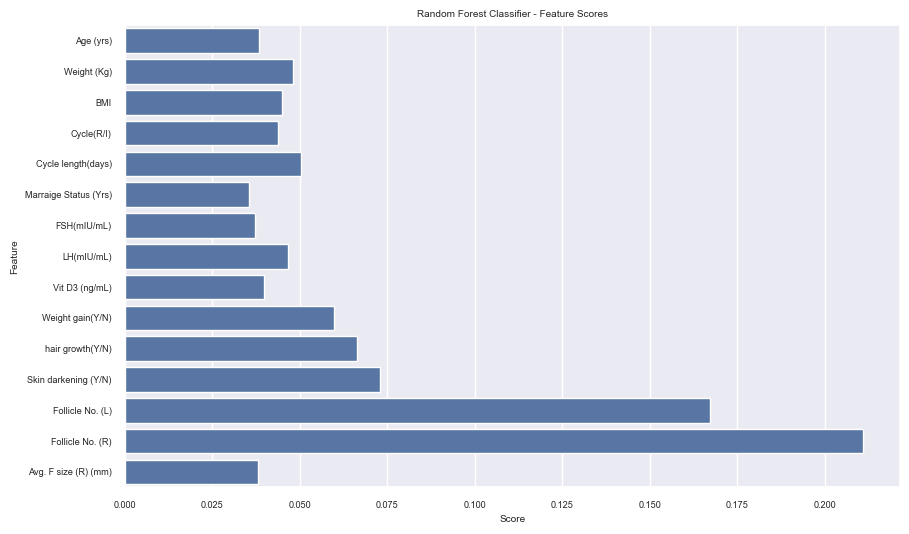

In [227]:
# Get scores for Random Forest Classifier
rfc_model = rfe_rfc.estimator_
rfc_model.fit(x_train_rfe_rfc, y_train)
rfc_scores = rfc_model.feature_importances_

# Visualizing scores for Random Forest Classifier
plt.figure(figsize=(10, 6))
sns.barplot(x=rfc_scores, y=features_rfc)
plt.title('Random Forest Classifier - Feature Scores')
plt.xlabel("Score")
plt.ylabel("Feature")
plt.show()

In [228]:
x_test_rfe_rfc = rfe_rfc.transform(X_test)

# Step 9: Train the model with the selected features
best_rfc.fit(x_train_rfe_rfc_df, y_train)


y_pred = best_rfc.predict(x_test_rfe_rfc)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest Classifier: ", accuracy)

Accuracy of Random Forest Classifier:  0.8711656441717791


# LASSO REGRESSION

In [229]:
from sklearn.linear_model import Lasso
from sklearn.metrics import f1_score, accuracy_score, classification_report
import matplotlib.pyplot as plt

In [230]:
lasso = Lasso()

# Define the parameter grid for Grid Search
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]}, scoring='f1',
             verbose=2)

Accuracy Lasso Regression:  0.8282208588957055
F1 Score Lasso Regression:  0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       108
           1       0.80      0.65      0.72        55

    accuracy                           0.83       163
   macro avg       0.82      0.79      0.80       163
weighted avg       0.83      0.83      0.82       163



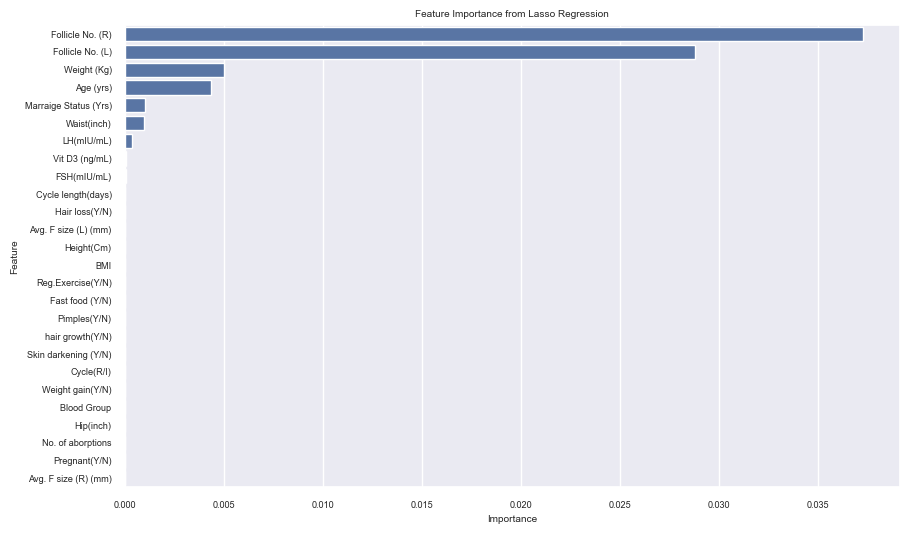

In [231]:
best_lasso = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_lasso.predict(X_test)
y_pred_class = np.where(y_pred > 0.5, 1, 0)  # Convert predictions to binary class

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred_class)
print("Accuracy Lasso Regression: ", accuracy)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred_class)
print("F1 Score Lasso Regression: ", f1)

# Detailed classification report
print("Classification Report:\n", classification_report(y_test, y_pred_class))

# Feature importance
feature_importance = np.abs(best_lasso.coef_)
features = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Lasso Regression')
plt.show()